In [3]:
import pandas as pd

df = pd.read_csv("cardata.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
print ("1. ANALISIS EXPLORATORIO DE DATOS")

1. ANALISIS EXPLORATORIO DE DATOS


In [6]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("cardata.csv")

# Ver las primeras filas para revisar cómo están los datos
print(df.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [7]:
# Información general sobre el dataset
print(df.info())

# Estadísticas descriptivas (media, min, max, etc.)
print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       

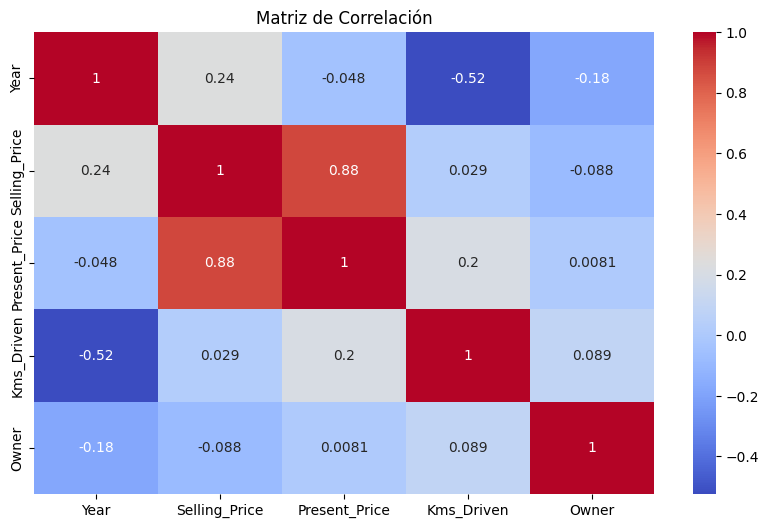

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

In [14]:
print ("2. PREPROCESAMIENTO DE DATOS")

2. PREPROCESAMIENTO DE DATOS


In [15]:
# Eliminar filas con valores nulos
df = df.dropna()

In [16]:
df['Year'] = df['Year'].astype(int)

In [17]:
df = pd.get_dummies(df, drop_first=True)  # Convierte 'Fuel_Type' a columnas binaras

In [19]:
print ("3. SELECCION DE CARACTERISTICAS")

3. SELECCION DE CARACTERISTICAS


In [20]:
# Selección de las características (X) y la variable objetivo (y)
X = df[['Year', 'Kms_Driven', 'Present_Price', 'Fuel_Type_Diesel']]  # Características
y = df['Selling_Price']  # Variable objetivo

In [21]:
print ("4. DIVISION DEL DATASET EN TRAIN Y TEST")

4. DIVISION DEL DATASET EN TRAIN Y TEST


In [22]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print ("5. ENTRENAMIENTO DEL MODELO DE REGRESION LINEAL")

5. ENTRENAMIENTO DEL MODELO DE REGRESION LINEAL


In [24]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = model.predict(X_test)

In [25]:
print ("6. EVALUACION DEL MODELO")

6. EVALUACION DEL MODELO


In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calcular las métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados de la evaluación
print(f"MAE (Error Absoluto Medio): {mae}")
print(f"MSE (Error Cuadrático Medio): {mse}")
print(f"R² (Coeficiente de Determinación): {r2}")

MAE (Error Absoluto Medio): 1.2796479159156562
MSE (Error Cuadrático Medio): 3.429148733095093
R² (Coeficiente de Determinación): 0.8511368908362353


In [27]:
print ("7. VISUALIZACION DE LOS RESULTADOS")

7. VISUALIZACION DE LOS RESULTADOS


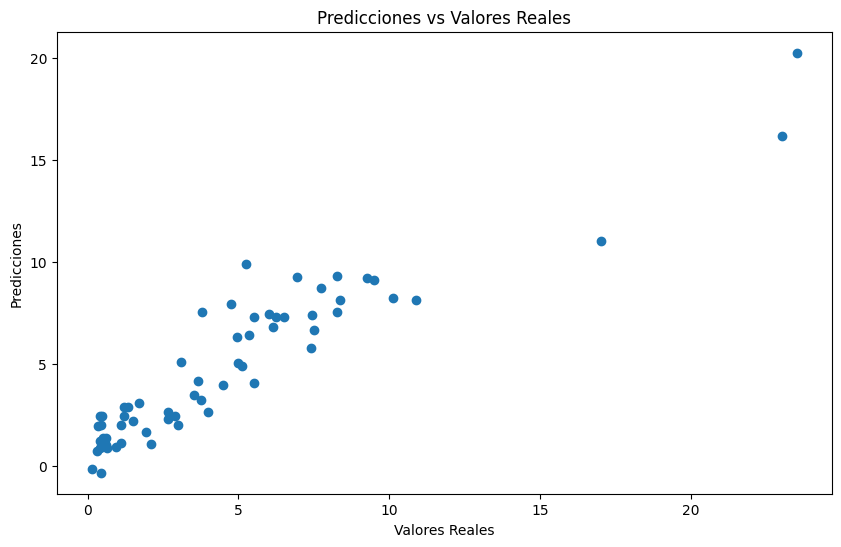

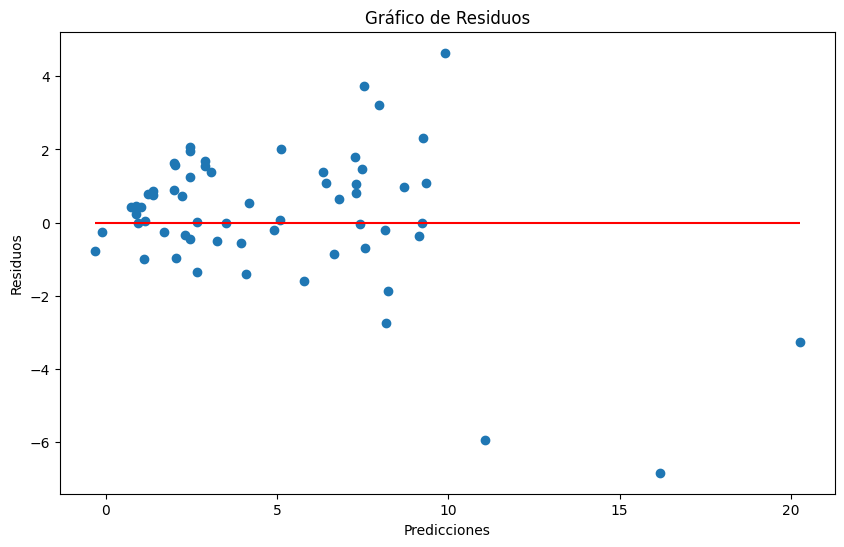

In [29]:
# Gráfico de Residuos
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()

In [30]:
print ("8. interpretacion y documentacion de los resultados")

8. interpretacion y documentacion de los resultados


In [34]:
print ("MAE (Error Absoluto Medio): Este es el error promedio entre las predicciones y los valores reales. Un valor bajo indica que las predicciones son cercanas a los valores reales.")

MAE (Error Absoluto Medio): Este es el error promedio entre las predicciones y los valores reales. Un valor bajo indica que las predicciones son cercanas a los valores reales.


In [35]:
print ("MSE (Error Cuadrático Medio): Es el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales. Al ser cuadrado, penaliza más los errores grandes.")

MSE (Error Cuadrático Medio): Es el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales. Al ser cuadrado, penaliza más los errores grandes.


In [36]:
print ("R² (Coeficiente de Determinación): Indica qué porcentaje de la variabilidad de la variable objetivo (precio de venta) es explicado por las características seleccionadas. Si R² es cercano a 1, significa que el modelo tiene un buen ajuste.")

R² (Coeficiente de Determinación): Indica qué porcentaje de la variabilidad de la variable objetivo (precio de venta) es explicado por las características seleccionadas. Si R² es cercano a 1, significa que el modelo tiene un buen ajuste.
